# ANPR
```
Assemble ANPR detection
```

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.148 🚀 Python-3.10.10 torch-2.0.1 CPU (Intel Core(TM) i5-1038NG7 2.00GHz)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 263.4/465.6 GB disk)


In [24]:
# Load the model and predict the image
from ultralytics import YOLO
import pathlib

model = YOLO("../demo/models/anpr/anprv8n.pt")


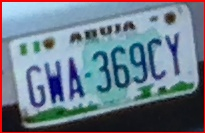

In [25]:
# Load image
import cv2
from IPython.display import display, Image

# Load image color
img = cv2.imread("../demo/store/10_lp.jpg")

Image(filename='../demo/store/10_lp.jpg')


0: 416x640 1 3, 1 6, 1 9, 1 A, 1 C, 1 G, 1 W, 1 Y, 98.3ms
Speed: 5.8ms preprocess, 98.3ms inference, 3.2ms postprocess per image at shape (1, 3, 416, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'G', 16: 'J', 17: 'K', 18: 'N', 19: 'P', 20: 'R', 21: 'S', 22: 'T', 23: 'W', 24: 'Y', 25: 'Z'}
orig_img: array([[[  6,   0, 255],
        [  2,   0, 253],
        [  0,   0, 253],
        ...,
        [  2,   0, 253],
        [  2,   0, 254],
        [  0,   0, 253]],

       [[  1,   0, 252],
        [ 13,  10, 244],
        [ 16,  13, 212],
        ...,
        [ 23,  20, 206],
        [ 21,  18, 222],
        [  1,   3, 241]],

       [[  2,   3, 255],
        [ 15,  13, 209],
        [203, 196, 255],
        ...,
        [ 96,  90, 143],
        [ 77,  73, 176],
        [ 21,  16, 221]],

       ...,

       [[  2,   0, 252],
        [ 25,  22, 208],
        [  0,   0,  54],
        ...,
        [ 5

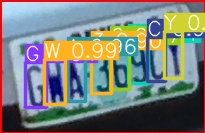

In [26]:
# Read image
results = model(img)

# Visualize predictions
cv2.imwrite('results.jpg', results[0].plot())
print(results[0])
Image('results.jpg')

In [27]:
import numpy as np

names = results[0].names
boxes = results[0].boxes.data.numpy()

# Sort boxes by x1 coordinate (left to right)
boxes = boxes[boxes[:, 0].argsort()].tolist()

# Add names to boxes
labels = [names[box[-1]] for box in boxes]

# Add labels column to boxes
boxes = [box + [label] for box, label in zip(boxes, labels)]

# Assemble license plate number
lpn = "".join([box[-1] for box in boxes])
lpn_conf = np.mean([box[4] for box in boxes])

# Print boxes
print(f"License plate number: {lpn} (confidence: {lpn_conf:.2f})")
print(boxes)

License plate number: GWA369CY (confidence: 0.92)
[[25.111570358276367, 62.70513916015625, 46.51313781738281, 107.3979263305664, 0.9394227266311646, 15.0, 'G'], [44.10090637207031, 59.60029220581055, 65.609619140625, 104.4334945678711, 0.9923064112663269, 23.0, 'W'], [67.06402587890625, 55.38239288330078, 85.9710464477539, 101.44551086425781, 0.9613499641418457, 10.0, 'A'], [91.39745330810547, 49.05066680908203, 111.76087188720703, 93.69754791259766, 0.903742253780365, 3.0, '3'], [110.7781753540039, 44.72428894042969, 129.9987335205078, 89.95480346679688, 0.8654577136039734, 6.0, '6'], [128.90574645996094, 42.29845428466797, 148.47970581054688, 83.70417785644531, 0.8139083385467529, 9.0, '9'], [147.5785369873047, 37.54454040527344, 165.564208984375, 81.21402740478516, 0.943046510219574, 12.0, 'C'], [164.36386108398438, 31.10718536376953, 182.11363220214844, 78.19527435302734, 0.9553743600845337, 24.0, 'Y']]


In [1]:
chairs = ["chair1", "chair2", "chair3T", "chair4", "chair5T"]
print(chairs)
i = 0
while i < len(chairs):
    if "T" in chairs[i]:
        chairs.remove(chairs[i])
    
    i += 1
print(chairs)

['chair1', 'chair2', 'chair3T', 'chair4', 'chair5T']
['chair1', 'chair2', 'chair4']


In [8]:
numbers = range(1, 10000001)

i = 0  # index
num_even = 0   # numbers of even number

while i < len(numbers):
    # check if number is even
    if numbers[i] % 2 == 0:
        num_even += 1
    
    # increase the index
    i += 1

print(f"{num_even} out of {len(numbers)} are even")

5000000 out of 10000000 are even


In [11]:
numbers = range(1, 10000001)

for i in numbers:
    print(i, end="\r")

33200

KeyboardInterrupt: 